In [1]:
import pandas as pd
import transform
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp 
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Exploring
import scipy.stats as stats

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

## Reading in the data and transforming it:

In [2]:
df = transform.load_all(filepath='/Users/rachelreuter/Desktop/Capstone_-_Bridging_the_Digital_Divide/Data')

In [3]:
df.head(3)

blockgroup  male_age_bin_0-19_p  male_age_bin_20-29_p  males_age_bin_30-44_p  male_age_bin_45-59_p  male_age_bin_60+_p  female_age_bin_0-19_p  female_age_bin_20-29_p  females_age_bin_30-44_p  female_age_bin_45-59_p  female_age_bin_60+_p  pop_tot  income_median  income_0-19k_p  income_20-24k_p  income_25-39k_p  income_40-64k_p  income_65k+_p   White_p  African_American_p  Native_American_p   Asian_p  Hawaiian_Pac_Islander_p  Hispanic/Latino_p  pcat_10x1_mean  pcat_10x1_median
0  480291101001             0.000000              0.164000               0.290000              0.094000            0.070000               0.016000                0.130000                 0.084000                0.050000              0.102000      500          31314        0.284848         0.018182         0.384848         0.093939       0.218182  0.864000            0.026000           0.000000  0.010000                      0.0           0.318000               4                 4
1  480291101002             0.045521              0.117474               0.066079              0.130690            0.245228               0.000000                0.020558                 0.058737                0.093979              0.221733      681          45655        0.240000         0.046316         0.115789         0.320000       0.277895  0.883994            0.055800           0.000000  0.000000                      0.0           0.512482               4                 4
2  480291101003             0.056018              0.147046               0.257330              0.091028            0.102407               0.030197                0.055580                 0.122976                0.073085              0.064333     2285          47988        0.261603         0.034810         0.168776         0.108650       0.426160  0.766740            0.045952           0.010503  0.002626                      0.0           0.737418               4                 4

## Creating a binary field to identify broadband adoption (>=80%):

In [4]:
df["has_broadband"] = [1 if ele  >= 4 else 0 for ele in df["pcat_10x1_mean"]]
# "4" above implies broadband of at least 80%

In [5]:
list(df.columns)

['blockgroup',
 'male_age_bin_0-19_p',
 'male_age_bin_20-29_p',
 'males_age_bin_30-44_p',
 'male_age_bin_45-59_p',
 'male_age_bin_60+_p',
 'female_age_bin_0-19_p',
 'female_age_bin_20-29_p',
 'females_age_bin_30-44_p',
 'female_age_bin_45-59_p',
 'female_age_bin_60+_p',
 'pop_tot',
 'income_median',
 'income_0-19k_p',
 'income_20-24k_p',
 'income_25-39k_p',
 'income_40-64k_p',
 'income_65k+_p',
 'White_p',
 'African_American_p',
 'Native_American_p',
 'Asian_p',
 'Hawaiian_Pac_Islander_p',
 'Hispanic/Latino_p',
 'pcat_10x1_mean',
 'pcat_10x1_median',
 'has_broadband']

## split data to explore

In [6]:
df.shape

(1053, 27)

In [7]:
train, test = train_test_split(df, test_size=.30, random_state=123)

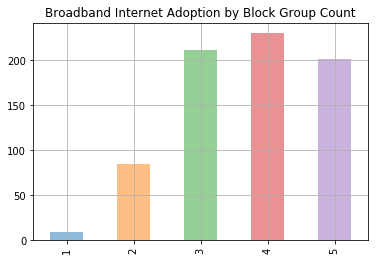

In [9]:
train.pcat_10x1_mean.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Broadband Internet Adoption by Block Group Count")
plt.grid(b = True , which = "major")

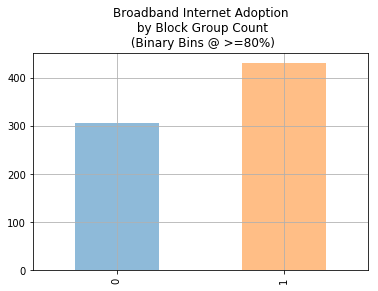

In [16]:
train.has_broadband.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Broadband Internet Adoption\n by Block Group Count\n (Binary Bins @ >=80%)")
plt.grid(b = True , which = "major")

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), cmap='Purples', annot=True)

<Figure size 216x144 with 0 Axes>

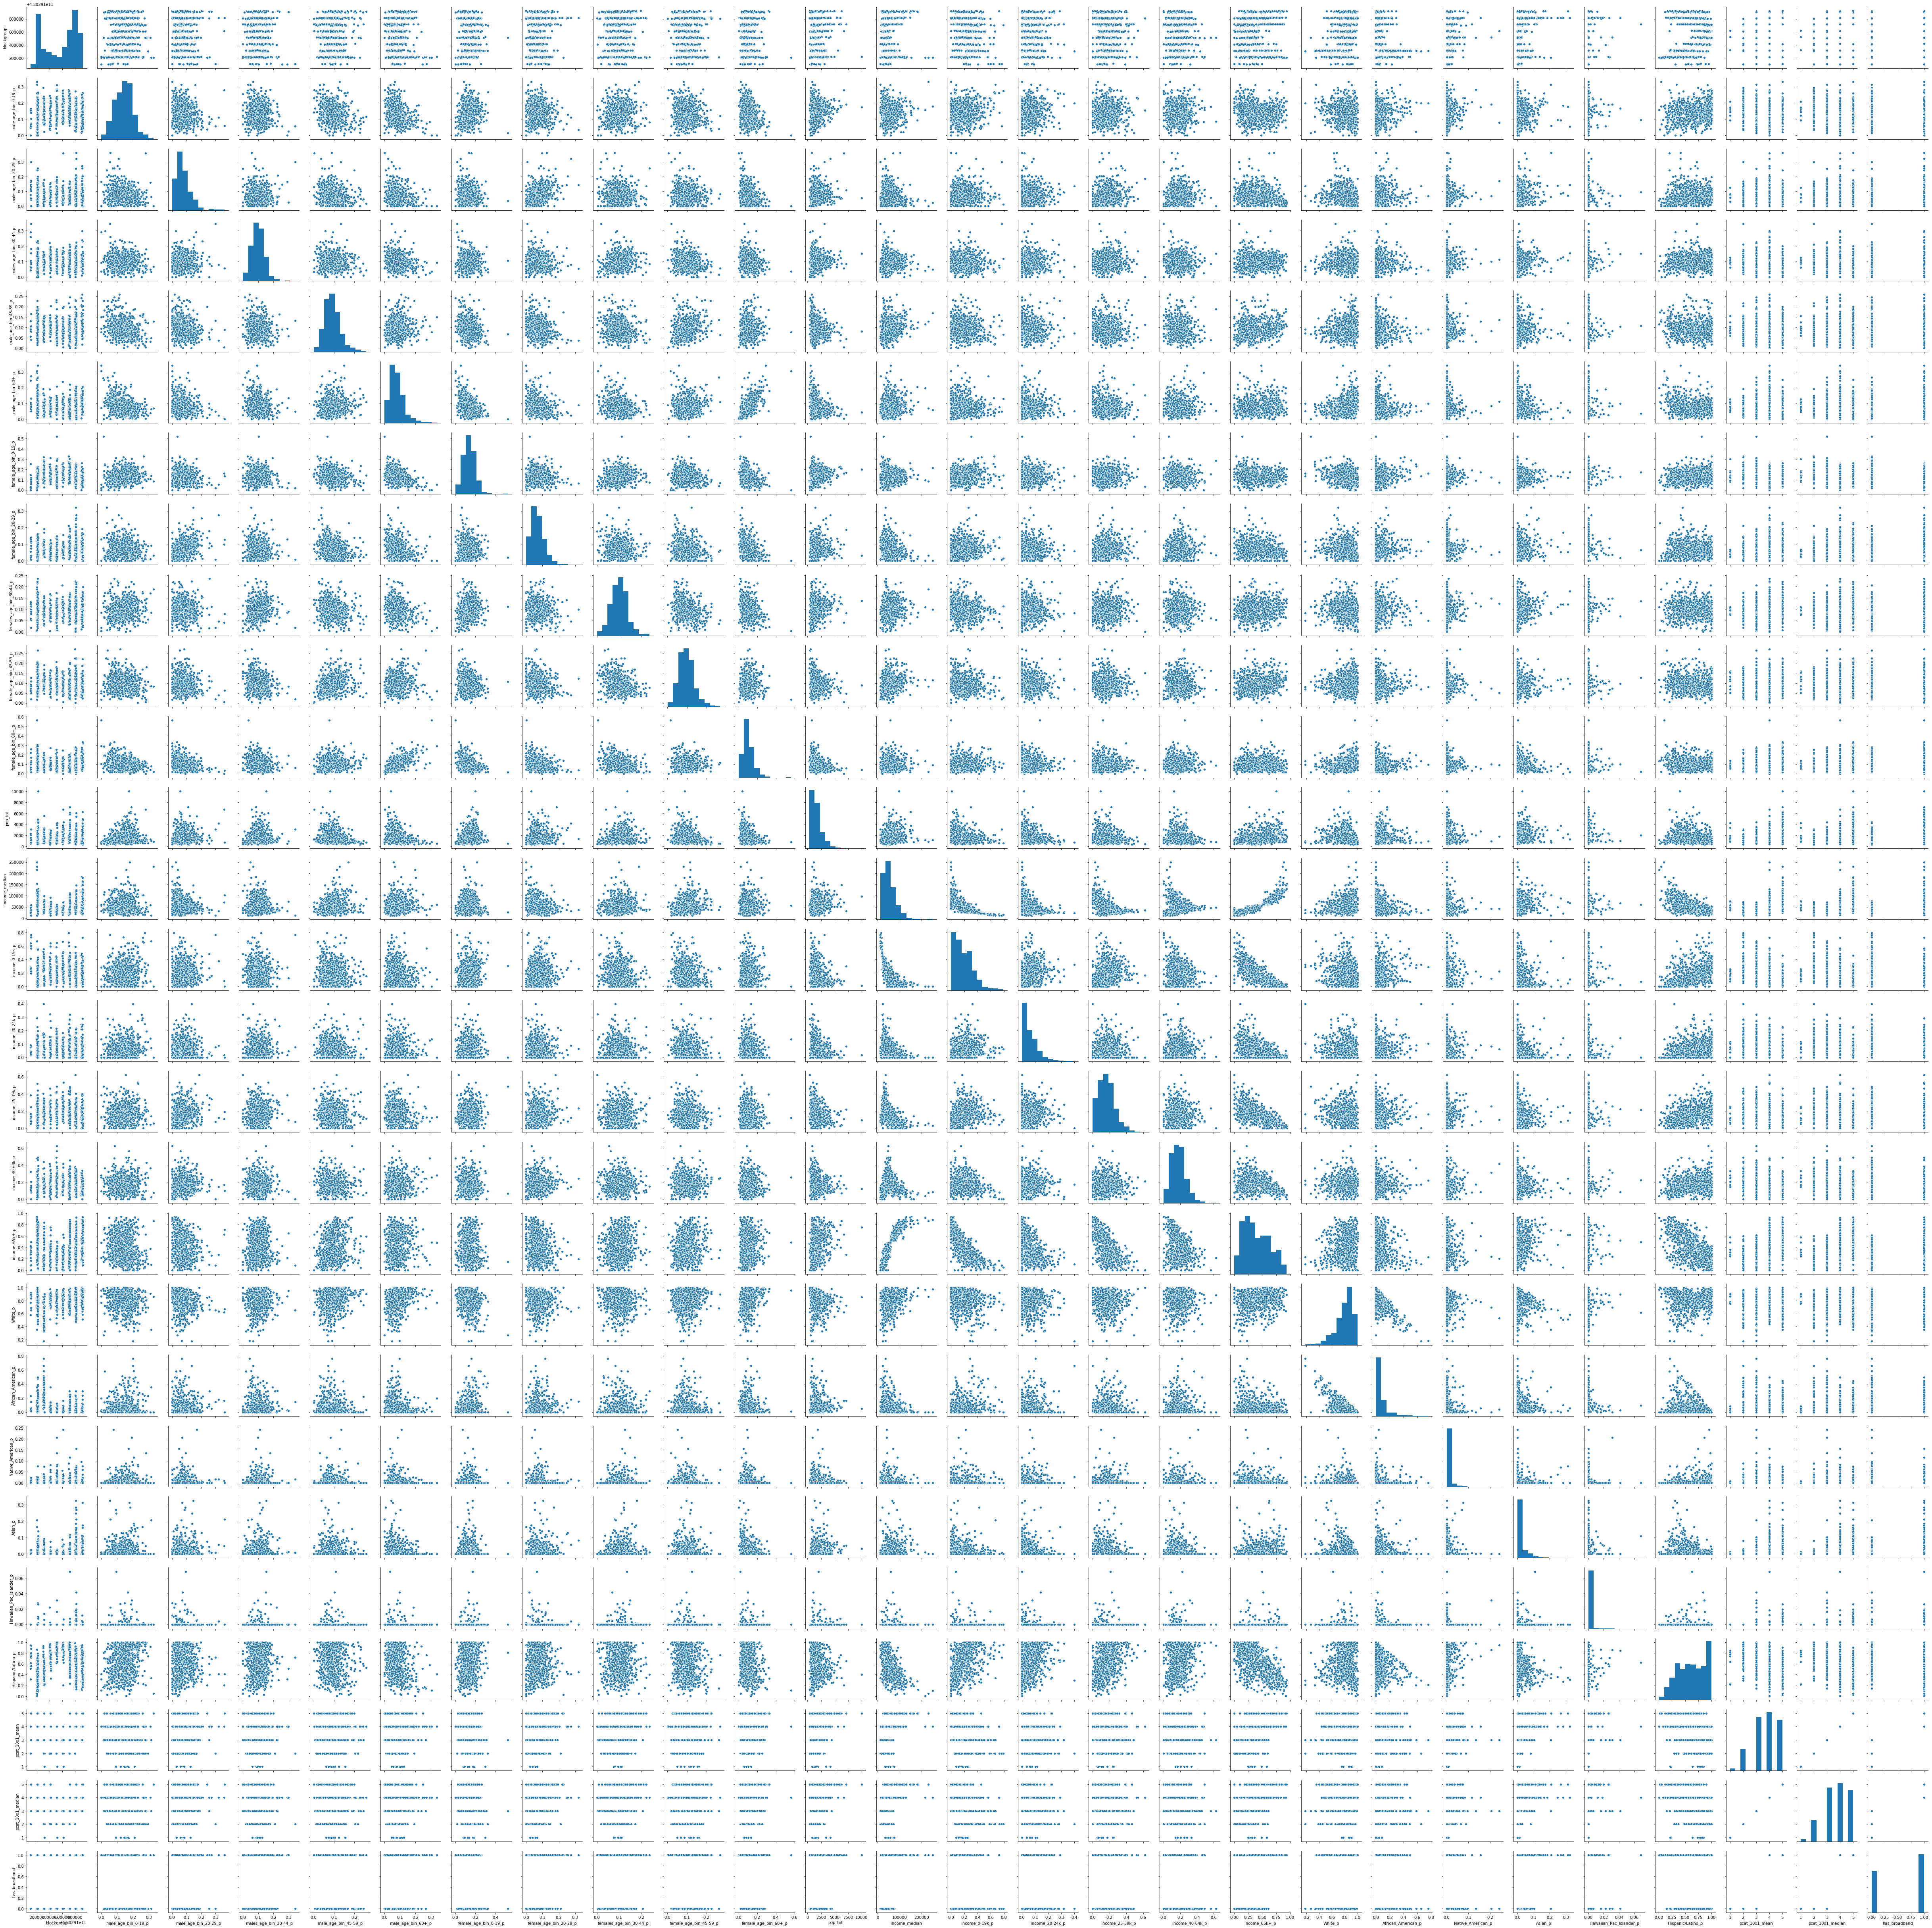

In [18]:
plt.figure(figsize=(3,2))
sns.pairplot(train)

# Exploration by field and/or combination of fields:

## IMPORTANT VIZ's

## Internet adoption by median income:

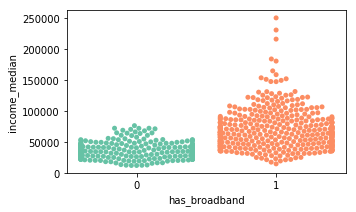

In [20]:
plt.figure(figsize=(5,3))
sns.swarmplot(x="has_broadband", y="income_median", data=train, palette="Set2")

## Internet adoption by percentage of Hispanic/Latino density in all block groups:

In [21]:
plt.figure(figsize=(5,3))
sns.swarmplot(x="has_broadband", y="Hispanic/Latino_p", data=train, palette="Set2")

In [22]:
list(train.columns)

['blockgroup',
 'male_age_bin_0-19_p',
 'male_age_bin_20-29_p',
 'males_age_bin_30-44_p',
 'male_age_bin_45-59_p',
 'male_age_bin_60+_p',
 'female_age_bin_0-19_p',
 'female_age_bin_20-29_p',
 'females_age_bin_30-44_p',
 'female_age_bin_45-59_p',
 'female_age_bin_60+_p',
 'pop_tot',
 'income_median',
 'income_0-19k_p',
 'income_20-24k_p',
 'income_25-39k_p',
 'income_40-64k_p',
 'income_65k+_p',
 'White_p',
 'African_American_p',
 'Native_American_p',
 'Asian_p',
 'Hawaiian_Pac_Islander_p',
 'Hispanic/Latino_p',
 'pcat_10x1_mean',
 'pcat_10x1_median',
 'has_broadband']

## Internet adoption by race density in block group:

#### Proportion white (race) by proportion hispanic/latino (ethnicity):

(0, 1.0)

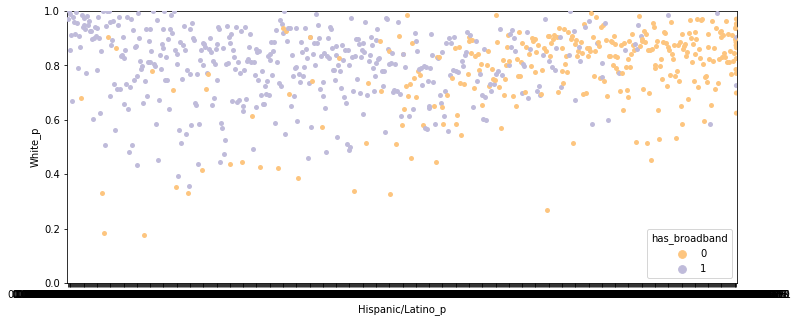

In [30]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="Hispanic/Latino_p", y="White_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

#### Broadband adoption by proportion hispanic/latino (ethnicity) vs proportion African American (race):

(0, 1.0)

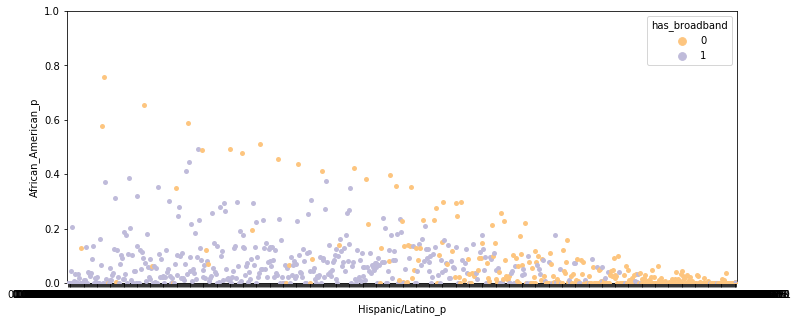

In [25]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="Hispanic/Latino_p", y="African_American_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

#### Proportion hispanic/latino (ethnicity) by median income in block groups:

(0, 1.0)

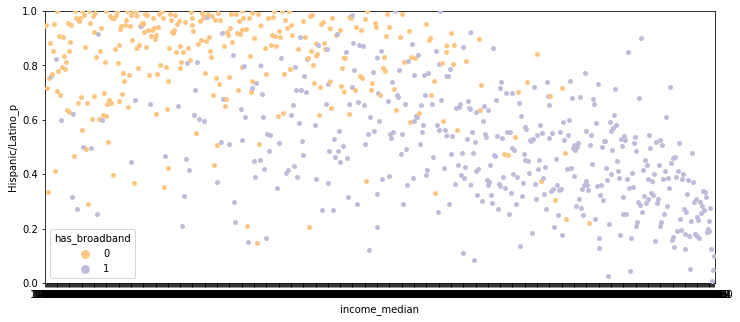

In [24]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="income_median", y="Hispanic/Latino_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

#### Proportion other races by hispanic/latino (ethnicity) by median income in block groups:

##### The visualizations below further illustrate that broadband adoption increases as the median household income rises, irrespective of race.

(0, 1.0)

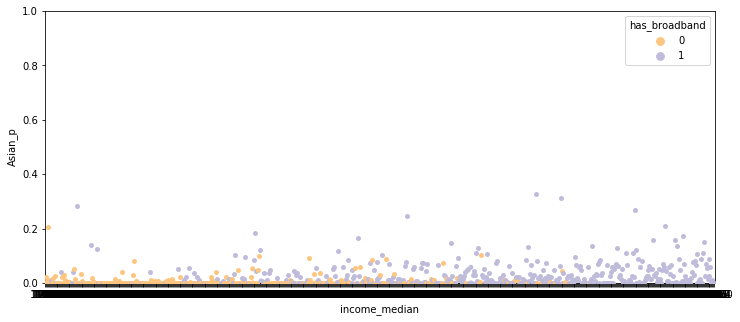

In [26]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="income_median", y="Asian_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

(0, 1.0)

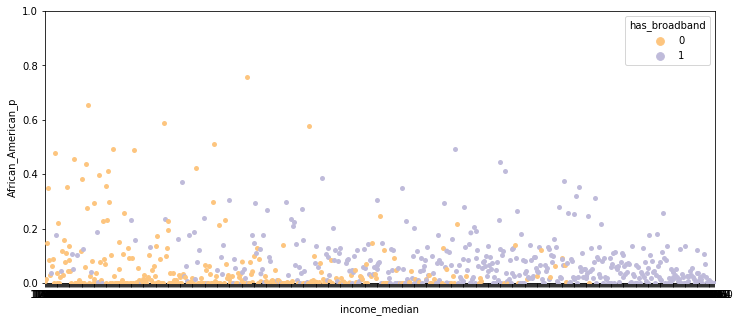

In [27]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="income_median", y="African_American_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

(0, 1.0)

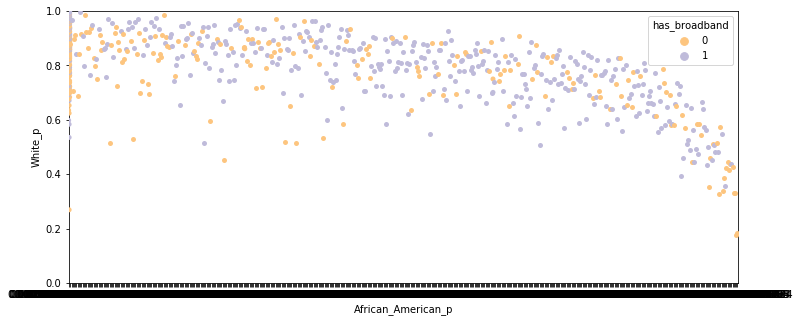

In [28]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="African_American_p", y="White_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

# Other simple plots of broadband adoption by race or ethnicity:

In [ ]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="White_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="Asian_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="African_American_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="Hispanic/Latino_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="male_age_bin_0-19_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="male_age_bin_20-29_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="males_age_bin_30-44_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="male_age_bin_45-59_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(3,2))
sns.swarmplot(x="has_broadband", y="male_age_bin_60+_p", data=train, palette="Set2")
plt.ylim(0, 1.0)

# Less important Viz's:

## Ages in Hispanic block groups:

In [ ]:
# = train['']
plt.figure(figsize=(12,5))
sns.swarmplot(x="male_age_bin_0-19_p", y="Hispanic/Latino_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

In [ ]:
# = train['']
plt.figure(figsize=(12,5))
sns.swarmplot(x="male_age_bin_20-29_p", y="Hispanic/Latino_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

In [ ]:
# = train['']
plt.figure(figsize=(12,5))
sns.swarmplot(x="males_age_bin_30-44_p", y="Hispanic/Latino_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="male_age_bin_45-59_p", y="Hispanic/Latino_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="male_age_bin_60+_p", y="Hispanic/Latino_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="male_age_bin_0-19_p", y="female_age_bin_0-19_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)

In [ ]:
plt.figure(figsize=(12,5))
sns.swarmplot(x="male_age_bin_60+_p", y="female_age_bin_60+_p", hue='has_broadband', data=train, palette="PuOr")
plt.ylim(0, 1.0)